In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
def scores(y_test,prediction):
#     print("Accuracy: " + str(accuracy_score(y_test, prediction) * 100) + "%")
#     print("Precision: " + str(precision_score(y_test, prediction) * 100) + "%")
#     print("F1 score: " + str(f1_score(y_test, prediction) * 100) + "%")
#     print("Recall: " + str(recall_score(y_test, prediction) * 100) + "%")
    scores = []
    scores.append(accuracy_score(y_test, prediction) * 100)
    scores.append(precision_score(y_test, prediction) * 100)
    scores.append(f1_score(y_test, prediction) * 100)
    scores.append(recall_score(y_test, prediction) * 100) 
    print('Accuracy:',accuracy_score(y_test, prediction) * 100,'%')
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test, prediction, target_names=["red wine","white wine"]))
    return scores

In [3]:
#carregando dataset de vinhos brancos e vermelhos
wines = pd.read_csv('wines.csv',sep=",")
#separando dados e saidas
X = wines.iloc[:,0:12]
Y = wines.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [4]:
# Create Gaussian Naive Bayes object with prior probabilities of each class
clf = GaussianNB(priors=[0.25,0.75])

# Train model
model = clf.fit(X_train, y_train)

In [5]:
prediction = clf.predict(X_test)
scores(y_test,prediction)

Accuracy: 97.15384615384616 %
[[319  14]
 [ 23 944]]
              precision    recall  f1-score   support

    red wine       0.93      0.96      0.95       333
  white wine       0.99      0.98      0.98       967

   micro avg       0.97      0.97      0.97      1300
   macro avg       0.96      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300



[97.15384615384616, 98.53862212943632, 98.07792207792207, 97.62150982419855]

In [6]:
normalizer = Normalizer(norm='l1')
winesl1 = X.copy()
winesl1.iloc[0:,0:12] = normalizer.transform(X)
winesl1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.030496,0.000659,0.001236,0.056459,0.000231,0.135996,0.692343,0.004114,0.011951,0.001813,0.035853,0.028848
1,0.037031,0.002051,0.001766,0.077195,0.000302,0.113942,0.643770,0.005671,0.018231,0.003190,0.062668,0.034182
2,0.086411,0.003227,0.004060,0.024986,0.000812,0.176987,0.447672,0.010353,0.034460,0.008016,0.130137,0.072877
3,0.036697,0.003556,0.002356,0.009061,0.000553,0.167630,0.693174,0.004517,0.014543,0.003126,0.042134,0.022653
4,0.042753,0.001579,0.002499,0.006577,0.000178,0.203899,0.591964,0.006507,0.021311,0.002368,0.080902,0.039464


<h2>Função Kfold</h2>

In [7]:
def cross_validation(dados,folds=10):
    scor = []
    kf = KFold(n_splits=folds)
    for train_index, test_index in kf.split(dados):
        X_train, X_test = dados.iloc[train_index], dados.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        model = clf.fit(X_train,y_train)
        prediction = model.predict(X_test)
        scor.append(scores(y_test,prediction))
    return scor

In [8]:
scorl1 = cross_validation(winesl1)

Accuracy: 93.38461538461539 %
[[134  26]
 [ 17 473]]
              precision    recall  f1-score   support

    red wine       0.89      0.84      0.86       160
  white wine       0.95      0.97      0.96       490

   micro avg       0.93      0.93      0.93       650
   macro avg       0.92      0.90      0.91       650
weighted avg       0.93      0.93      0.93       650

Accuracy: 95.07692307692308 %
[[143  11]
 [ 21 475]]
              precision    recall  f1-score   support

    red wine       0.87      0.93      0.90       154
  white wine       0.98      0.96      0.97       496

   micro avg       0.95      0.95      0.95       650
   macro avg       0.92      0.94      0.93       650
weighted avg       0.95      0.95      0.95       650

Accuracy: 95.07692307692308 %
[[150  19]
 [ 13 468]]
              precision    recall  f1-score   support

    red wine       0.92      0.89      0.90       169
  white wine       0.96      0.97      0.97       481

   micro avg       0.95

In [9]:
normalizer = Normalizer(norm='l2')
winesl2 = X.copy()
winesl2.iloc[0:,0:12] = normalizer.transform(X)
winesl2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.042946,0.000929,0.001741,0.079509,0.000325,0.191518,0.975001,0.005793,0.016830,0.002554,0.050491,0.040625
1,0.055812,0.003091,0.002662,0.116346,0.000455,0.171728,0.970265,0.008547,0.027477,0.004808,0.094451,0.051519
2,0.168350,0.006288,0.007910,0.048680,0.001582,0.344813,0.872175,0.020170,0.067137,0.015618,0.253539,0.141982
3,0.051258,0.004968,0.003291,0.012656,0.000772,0.234141,0.968204,0.006309,0.020313,0.004366,0.058852,0.031641
4,0.067390,0.002488,0.003940,0.010368,0.000280,0.321397,0.933089,0.010256,0.033591,0.003732,0.127522,0.062206


In [10]:
scorl2 = cross_validation(winesl2)

Accuracy: 92.92307692307692 %
[[125  35]
 [ 11 479]]
              precision    recall  f1-score   support

    red wine       0.92      0.78      0.84       160
  white wine       0.93      0.98      0.95       490

   micro avg       0.93      0.93      0.93       650
   macro avg       0.93      0.88      0.90       650
weighted avg       0.93      0.93      0.93       650

Accuracy: 96.3076923076923 %
[[139  15]
 [  9 487]]
              precision    recall  f1-score   support

    red wine       0.94      0.90      0.92       154
  white wine       0.97      0.98      0.98       496

   micro avg       0.96      0.96      0.96       650
   macro avg       0.95      0.94      0.95       650
weighted avg       0.96      0.96      0.96       650

Accuracy: 94.15384615384616 %
[[144  25]
 [ 13 468]]
              precision    recall  f1-score   support

    red wine       0.92      0.85      0.88       169
  white wine       0.95      0.97      0.96       481

   micro avg       0.94 

In [11]:
normalizer = Normalizer(norm='max')
winesmax = X.copy()
winesmax.iloc[0:,0:12] = normalizer.transform(X)
winesmax.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.044048,0.000952,0.001786,0.081548,0.000333,0.196429,1.0,0.005942,0.017262,0.002619,0.051786,0.041667
1,0.057522,0.003186,0.002743,0.119912,0.000469,0.176991,1.0,0.008809,0.028319,0.004956,0.097345,0.053097
2,0.193023,0.007209,0.009070,0.055814,0.001814,0.395349,1.0,0.023127,0.076977,0.017907,0.290698,0.162791
3,0.052941,0.005131,0.003399,0.013072,0.000797,0.241830,1.0,0.006516,0.020980,0.004510,0.060784,0.032680
4,0.072222,0.002667,0.004222,0.011111,0.000300,0.344444,1.0,0.010992,0.036000,0.004000,0.136667,0.066667


In [12]:
scormax = cross_validation(winesmax)

Accuracy: 92.46153846153847 %
[[121  39]
 [ 10 480]]
              precision    recall  f1-score   support

    red wine       0.92      0.76      0.83       160
  white wine       0.92      0.98      0.95       490

   micro avg       0.92      0.92      0.92       650
   macro avg       0.92      0.87      0.89       650
weighted avg       0.92      0.92      0.92       650

Accuracy: 95.84615384615385 %
[[133  21]
 [  6 490]]
              precision    recall  f1-score   support

    red wine       0.96      0.86      0.91       154
  white wine       0.96      0.99      0.97       496

   micro avg       0.96      0.96      0.96       650
   macro avg       0.96      0.93      0.94       650
weighted avg       0.96      0.96      0.96       650

Accuracy: 94.46153846153847 %
[[143  26]
 [ 10 471]]
              precision    recall  f1-score   support

    red wine       0.93      0.85      0.89       169
  white wine       0.95      0.98      0.96       481

   micro avg       0.94

In [14]:
scaller = MinMaxScaler(feature_range=(0, 12))
winesminmax = X.copy()
winesminmax.iloc[0:,0:12] = scaller.fit_transform(X)
winesminmax.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3.570248,0.64,2.168675,2.411043,0.936877,1.333333,4.479263,2.577212,1.674419,1.483146,1.217391,8.0
1,2.677686,2.24,2.240964,2.383436,0.877076,0.791667,2.958525,1.927126,4.465116,2.292135,5.217391,6.0
2,4.462810,1.84,2.819277,0.331288,1.375415,0.666667,1.023041,1.695778,5.488372,3.707865,7.826087,8.0
3,4.264463,5.64,3.759036,0.257669,2.252492,1.500000,4.064516,2.264893,4.558140,3.168539,2.260870,4.0
4,2.677686,1.28,2.746988,0.073620,0.358804,1.250000,2.322581,0.497397,4.837209,0.943820,7.478261,6.0


In [15]:
scorminmax = cross_validation(winesminmax)

Accuracy: 98.61538461538461 %
[[156   4]
 [  5 485]]
              precision    recall  f1-score   support

    red wine       0.97      0.97      0.97       160
  white wine       0.99      0.99      0.99       490

   micro avg       0.99      0.99      0.99       650
   macro avg       0.98      0.98      0.98       650
weighted avg       0.99      0.99      0.99       650

Accuracy: 97.07692307692307 %
[[152   2]
 [ 17 479]]
              precision    recall  f1-score   support

    red wine       0.90      0.99      0.94       154
  white wine       1.00      0.97      0.98       496

   micro avg       0.97      0.97      0.97       650
   macro avg       0.95      0.98      0.96       650
weighted avg       0.97      0.97      0.97       650

Accuracy: 98.0 %
[[164   5]
 [  8 473]]
              precision    recall  f1-score   support

    red wine       0.95      0.97      0.96       169
  white wine       0.99      0.98      0.99       481

   micro avg       0.98      0.98   

In [16]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(X)

# Show feature
winesS = X.copy()
winesS.iloc[0:,0:12] = standardized

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
scorss = cross_validation(winesS)

Accuracy: 98.61538461538461 %
[[156   4]
 [  5 485]]
              precision    recall  f1-score   support

    red wine       0.97      0.97      0.97       160
  white wine       0.99      0.99      0.99       490

   micro avg       0.99      0.99      0.99       650
   macro avg       0.98      0.98      0.98       650
weighted avg       0.99      0.99      0.99       650

Accuracy: 97.07692307692307 %
[[152   2]
 [ 17 479]]
              precision    recall  f1-score   support

    red wine       0.90      0.99      0.94       154
  white wine       1.00      0.97      0.98       496

   micro avg       0.97      0.97      0.97       650
   macro avg       0.95      0.98      0.96       650
weighted avg       0.97      0.97      0.97       650

Accuracy: 98.0 %
[[164   5]
 [  8 473]]
              precision    recall  f1-score   support

    red wine       0.95      0.97      0.96       169
  white wine       0.99      0.98      0.99       481

   micro avg       0.98      0.98   

In [22]:
def plot_graph(scor, pp):
    measures = ["accuracy","precision","f1-score","recall"]
    data = {s:{'Run '+str(i):scor[i][k] for i in range(10)}for k,s in enumerate(measures)}
    df = pd.DataFrame(data)

    df.plot(kind='barh',figsize=(20,20))

    for i in range(91,101):
        plt.axvline(x=i, color='k', linestyle='--')

    plt.xlim(90,101)
    plt.title('Naive Bayes x '+pp+' x Gaussian')
    plt.savefig('images_graphs/'+pp+'nb.png')
    plt.show()
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

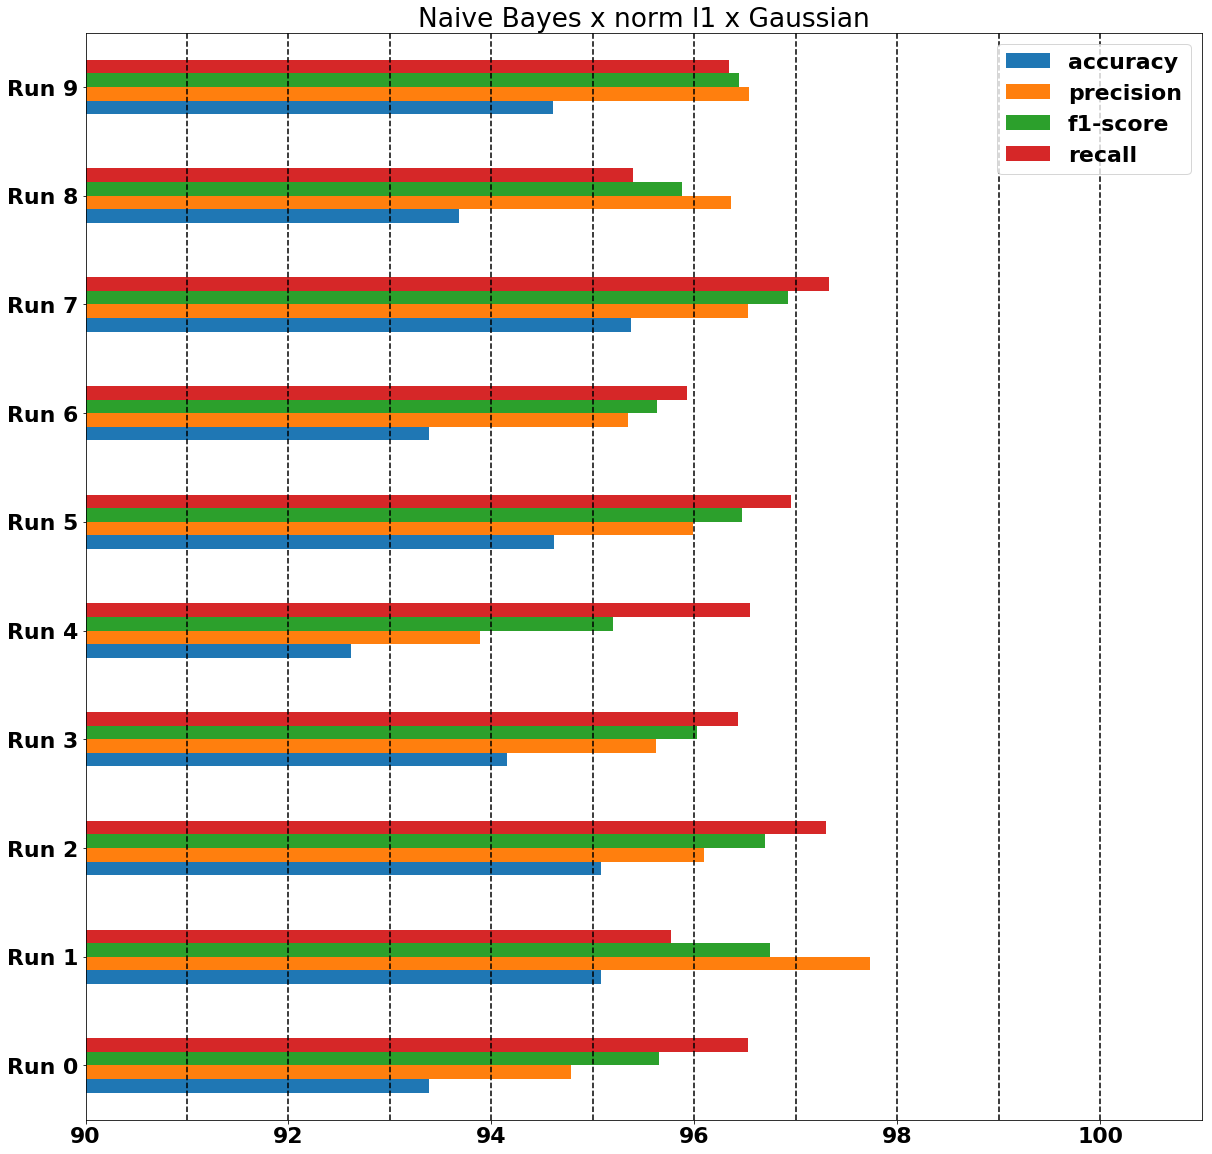

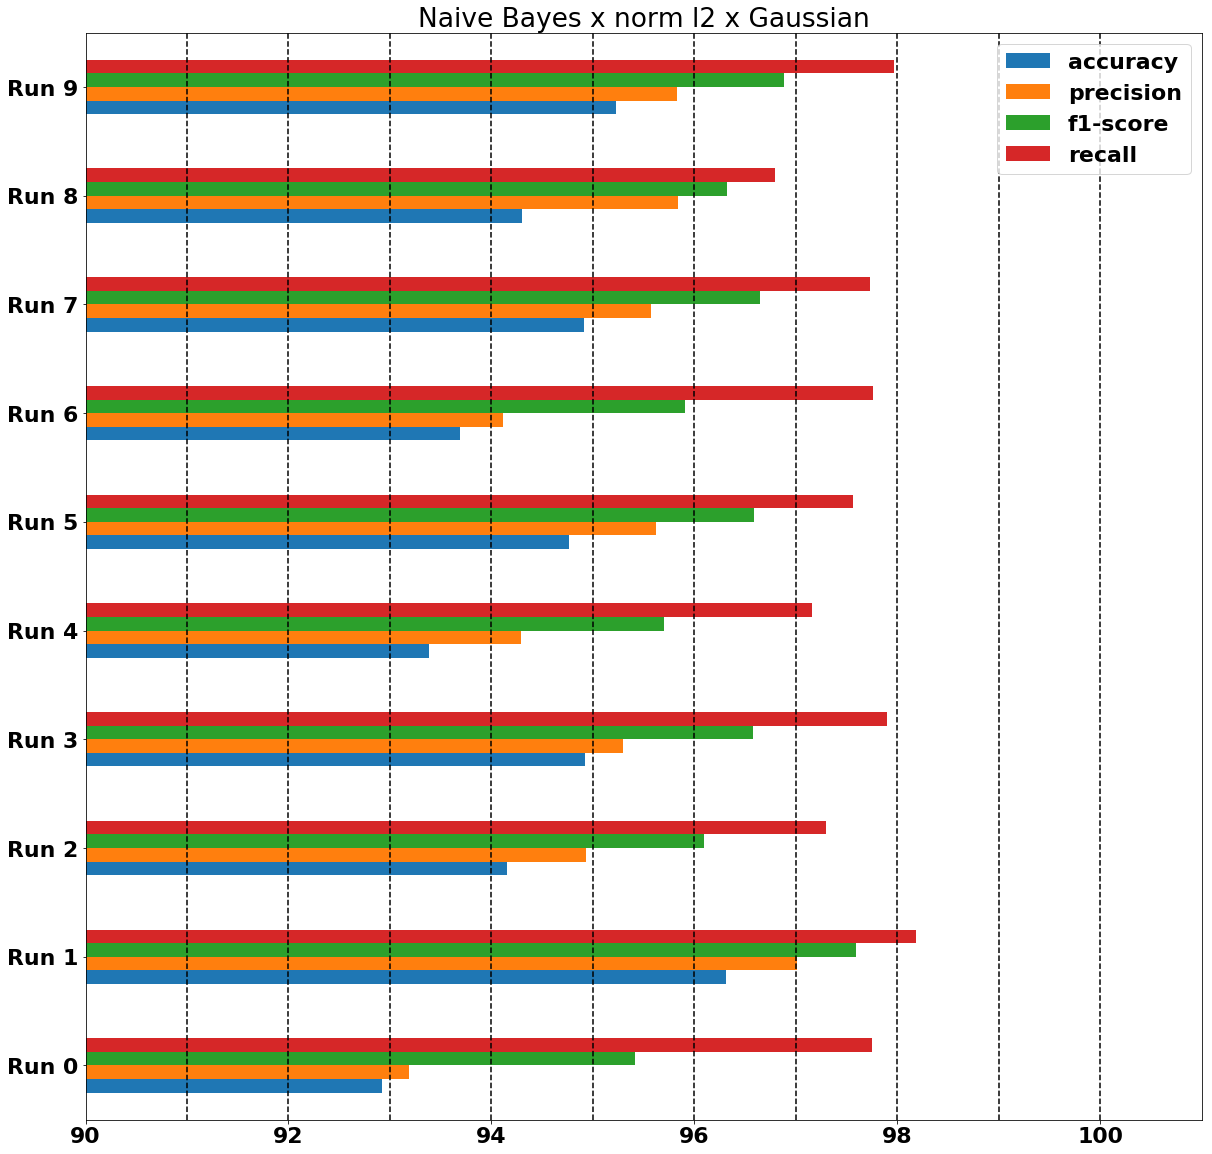

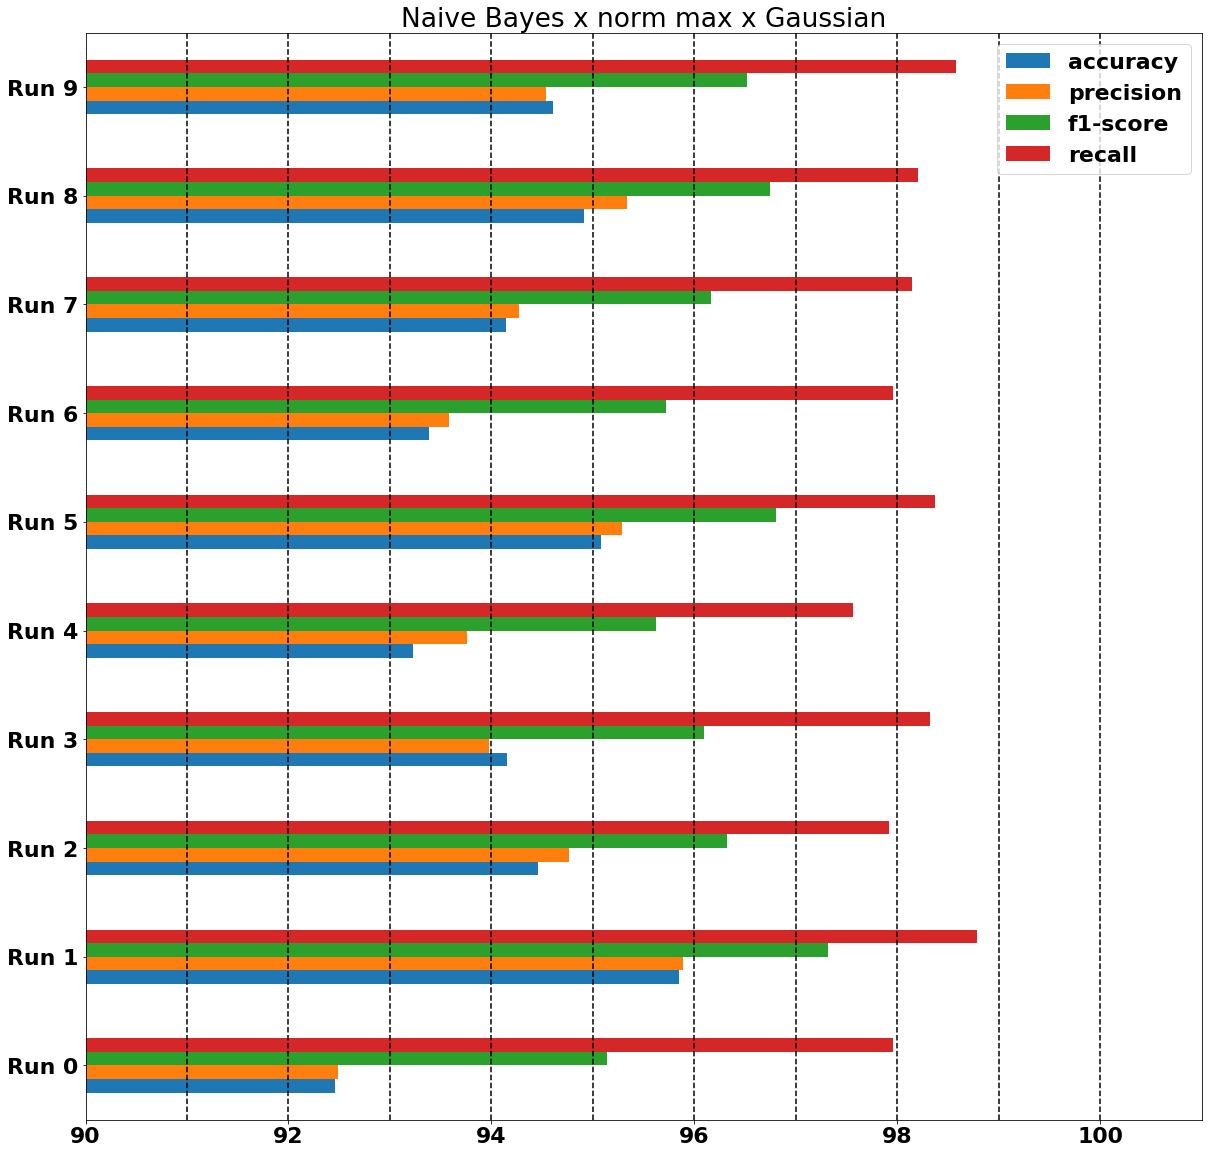

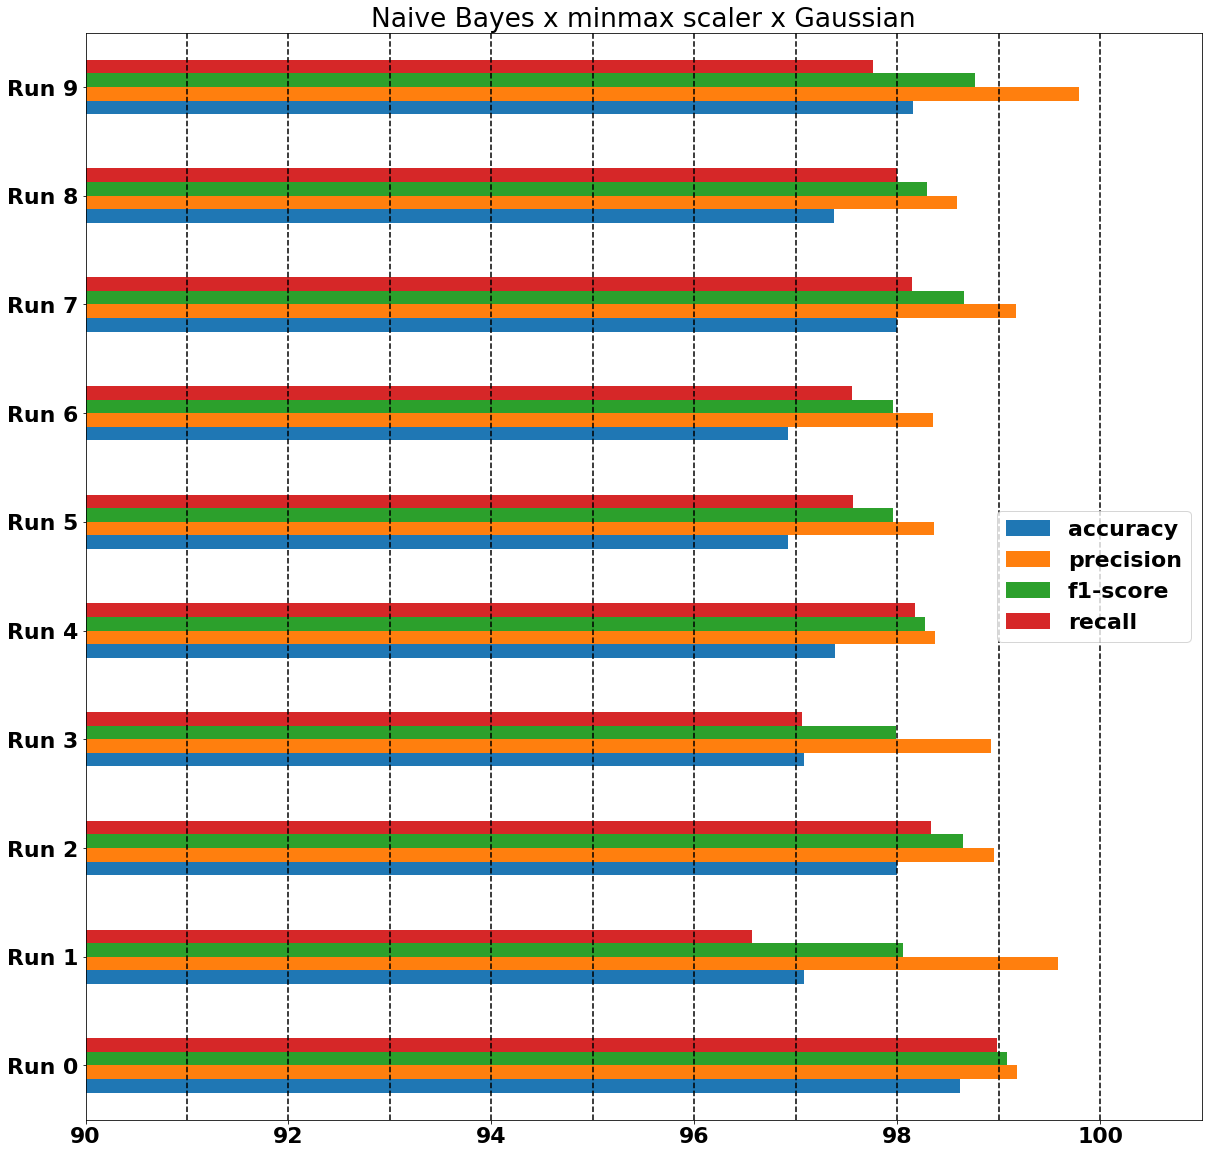

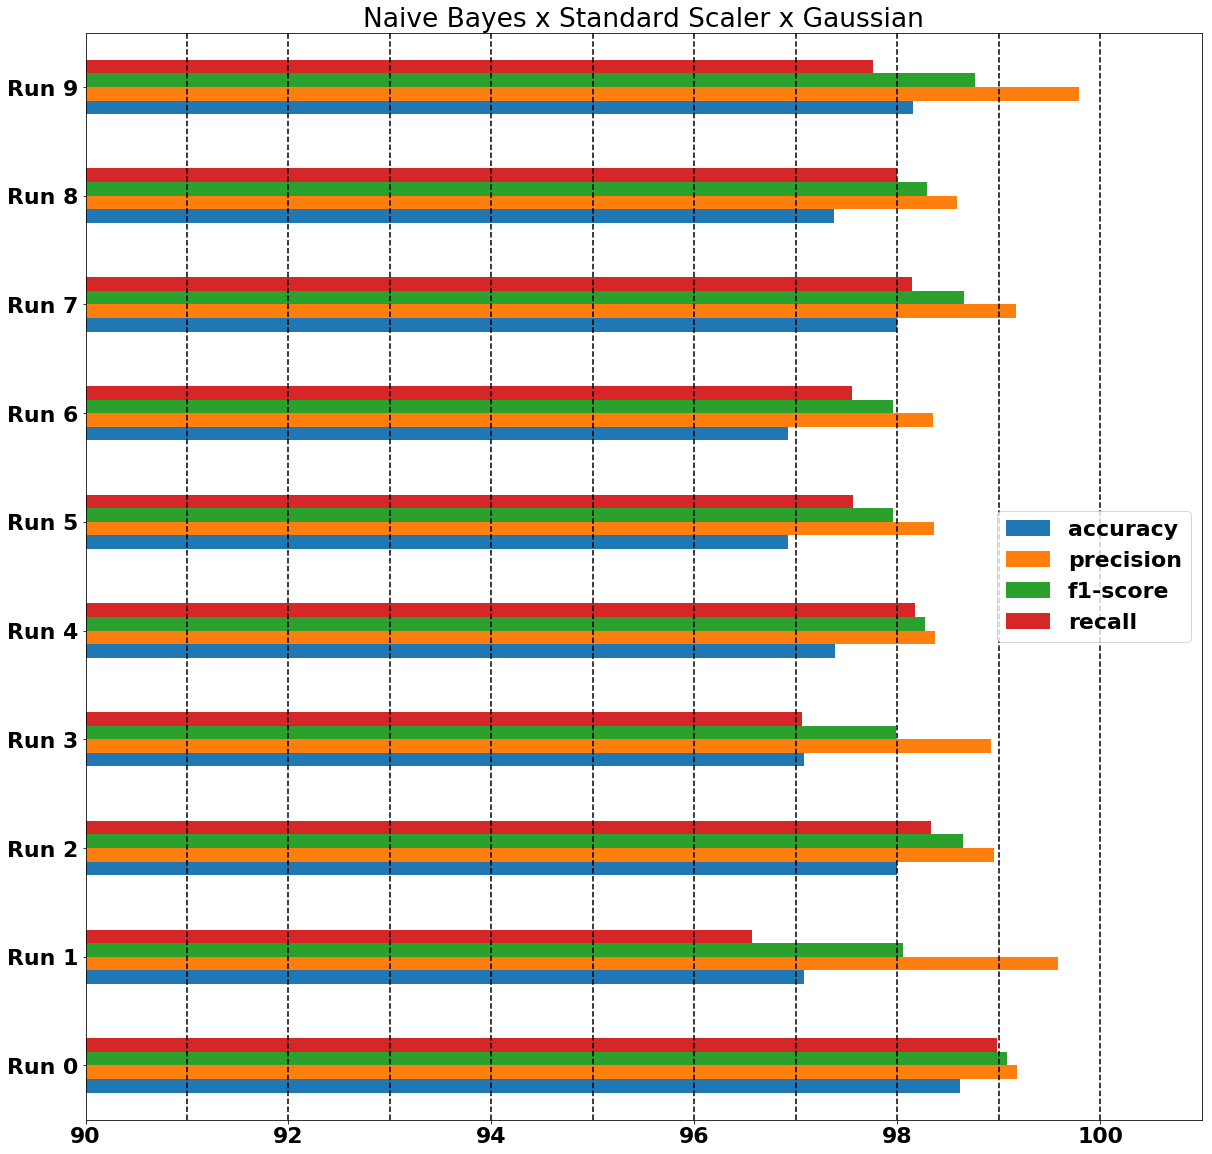

In [23]:
pps = ['norm l1','norm l2','norm max','minmax scaler','Standard Scaler']
scs = [scorl1,scorl2,scormax,scorminmax,scorss]
for pp,sc in zip(pps,scs):
    plot_graph(sc,pp)